In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
car=pd.read_csv('CAR DETAILS.csv')
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
1,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2,Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner
3,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner
4,Audi A4 1.8 TFSI,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner


𝑜𝑏𝑠𝑒𝑟𝑣𝑎𝑡𝑖𝑜𝑛: There are 4340 rows and 8 columns

In [3]:
car.shape

(4340, 8)

$observation$: there is no null values in this data set

In [4]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

$𝑜𝑏𝑠𝑒𝑟𝑣𝑎𝑡𝑖𝑜𝑛$: There are 5 objects and 3 integers datatype in the data set

In [5]:
car.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

$Observation$:
* Name, Fuel, Seller Type, Transmission, Owner are object Data type
* Year is integer type currently. Since Year is a categorical variable here, let us convert it to category data data type in Python.
* Remaining Two column variables are numerical and there for their python data types int64 are ok.

In [6]:
car.duplicated().sum()

763

In [7]:
car.drop_duplicates(inplace=True)

In [8]:
car.duplicated().sum()

0

$Conclusion$: There are 763 duplicates now we droped the duplicates.

In [9]:
car.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


$Obsercation$:-
* The Selling Price of a car Ranging from 20000 to 8900000 
* The mean Selling Price is close to the 75% Percentile of the data, indecating right skew.
* The standard deviation of selling price is high

$Observations$: There are 763 duplicates values in the Data set

#### value counts of categorical colunm Car Brands on line chart(matplotlib)

In [10]:
Car_Brand = car['name'].apply(lambda x : x.split(' ')[0])
car.insert(1,"Car Brand",Car_Brand)
#car.drop(['name'],axis=1,inplace=True)

In [11]:
car.head()

,name,Car Brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Ambassador CLASSIC 1500 DSL AC,Ambassador,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2,Ambassador Classic 2000 Dsz,Ambassador,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner
3,Ambassador Grand 1800 ISZ MPFI PW CL,Ambassador,2012,430000,50000,Petrol,Individual,Manual,Second Owner
4,Audi A4 1.8 TFSI,Audi,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner
5,Audi A4 2.0 TDI,Audi,2011,1295000,58000,Diesel,Dealer,Automatic,First Owner


In [12]:
c1=car['Car Brand'].value_counts()
print(c1.index)
c1.values

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Ford', 'Honda', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Nissan', 'Skoda', 'Fiat', 'Audi',
       'Datsun', 'BMW', 'Mercedes-Benz', 'Mitsubishi', 'Land', 'Jaguar',
       'Volvo', 'Ambassador', 'Jeep', 'OpelCorsa', 'MG', 'Isuzu', 'Force',
       'Daewoo', 'Kia'],
      dtype='object')


array([1072,  637,  328,  308,  220,  216,  170,  151,  110,   93,   52,
         49,   32,   31,   29,   25,   21,    5,    5,    5,    4,    3,
          3,    2,    2,    1,    1,    1,    1], dtype=int64)

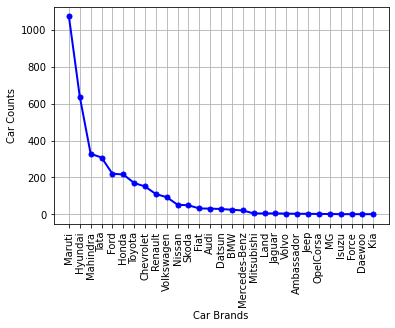

In [13]:
plt.plot(c1.index,c1.values,color='blue',marker='o',lw=2,markersize=5)
plt.xlabel('Car Brands')
plt.ylabel('Car Counts')
plt.xticks(rotation=90)
plt.grid()
plt.show()

$Conclusion$: Maruti, Hyundai, Mahindra are top three cars with Large number of car series.

<b>value counts of categorical column namely fuels on line chart(matplotlib)

In [14]:
c1=car['fuel'].value_counts()
print(c1.index)
print(c1.values)

Index(['Diesel', 'Petrol', 'CNG', 'LPG', 'Electric'], dtype='object')
[1800 1717   37   22    1]


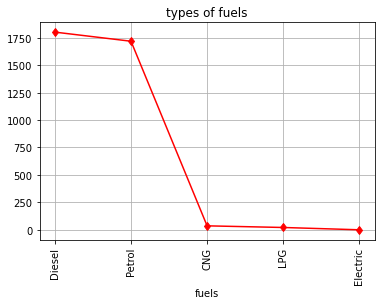

In [15]:
#plt.figure(figsize=(8,5))
plt.plot(c1.index,c1.values,color='red',marker='d')
plt.xlabel('fuels')
plt.title('types of fuels')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [16]:
car[car['fuel']=='Electric']

,name,Car Brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4024,Toyota Camry Hybrid,Toyota,2006,310000,62000,Electric,Dealer,Automatic,Second Owner


$Conculsion$:
* The Count of diesel cars and petrol cars are higer than CNG ,LPG, Electric
* And there is only one electric car in the data set.

In [17]:
c2=car['seller_type'].value_counts()
c2.index

Index(['Individual', 'Dealer', 'Trustmark Dealer'], dtype='object')

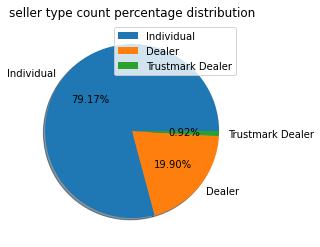

In [18]:
plt.pie(c2.values,labels=c2.index,autopct='%.2f%%',shadow=True,)
plt.title('seller type count percentage distribution')
plt.legend()
plt.show()

$Conclusion$: From the above graph we can see that most people sell their cars individually instead of going to dealers.

<b>Count values of Transmission in on bar chart using matplotlib

In [19]:
c3=car['transmission'].value_counts()
c3

Manual       3265
Automatic     312
Name: transmission, dtype: int64

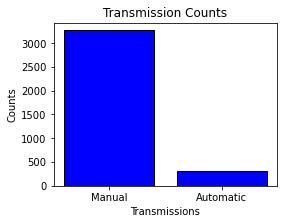

In [20]:
plt.figure(figsize=(4,3))
plt.bar(c3.index,c3.values,color='blue',edgecolor='black',label='Transmission counts')
plt.title('Transmission Counts')
plt.ylabel('Counts')
plt.xlabel('Transmissions')
plt.show()

$Conclusion$: Maximum number of cars are transmitted  manually.

### Count values of owner on char using 

In [21]:
c4=car['owner'].value_counts()
c4

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

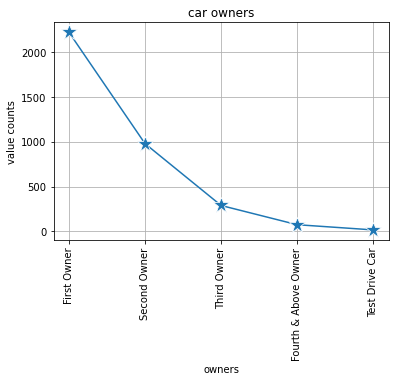

In [22]:
sns.lineplot(c4.index,c4.values,marker='*',markersize=17)
plt.xticks(rotation=90)
plt.title('car owners')
plt.ylabel('value counts')
plt.xlabel('owners')
plt.grid()
plt.show()

$Conclusion$: 
* From the above graph we can conclude that the number of First Owners selling their car is higher.
* The number of Fourth & Above Owners selling the car is low reason may be due to less profit through selling the cars.
* Test Drive Car are the lowest count of all other counts.

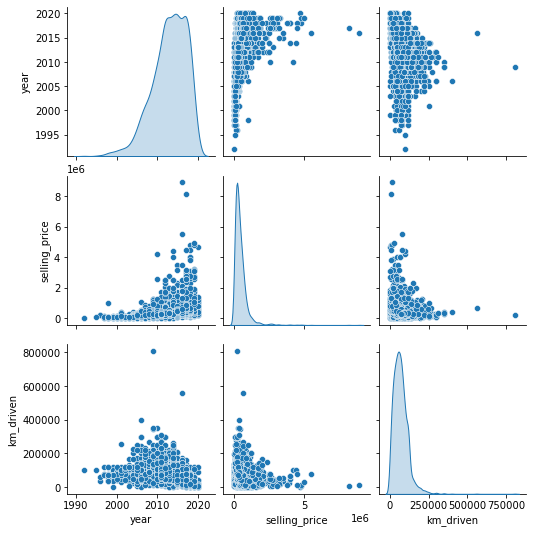

In [23]:
sns.pairplot(car,diag_kind='kde')
plt.show()

In [24]:
corr= car.corr()
print(corr)
#print(corr.index)
#corr.values

                  year  selling_price  km_driven
year           1.00000       0.424260  -0.417490
selling_price  0.42426       1.000000  -0.187359
km_driven     -0.41749      -0.187359   1.000000


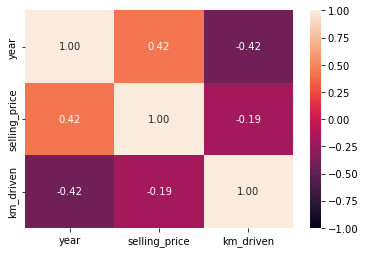

In [25]:
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,fmt=".2f")
plt.show()

$Conculsion$- 
* The Km driven and Selling Price have a very low negative correlation.
* Selling price and year have a moderate postive correlation. 

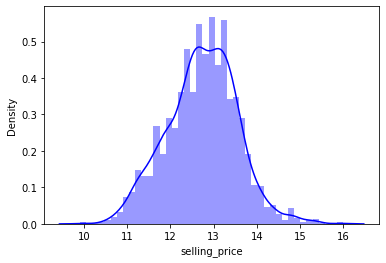

In [26]:
sns.distplot(np.log(car['selling_price']),color='blue')
plt.show()

### Bar chats

In [27]:
d1=car.groupby('year')['selling_price'].mean().reset_index()
d1=d1.sort_values(by='year',ascending=True)

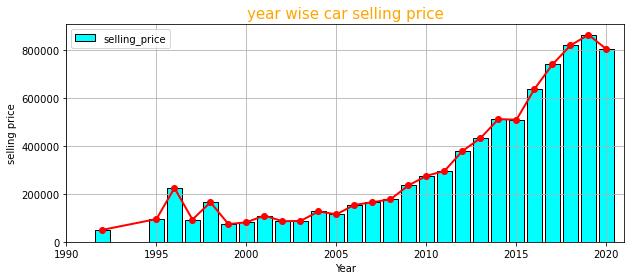

In [28]:
plt.figure(figsize=(10,4))
plt.bar(d1['year'],d1['selling_price'],color='cyan',edgecolor='black',label='selling_price')
plt.plot(d1['year'],d1['selling_price'],color='red',lw=2,marker='o')
plt.title('year wise car selling price',fontsize=15,color='Orange')
plt.xlabel('Year')
plt.ylabel('selling price')
plt.xlim(1990,2021)
plt.legend()
plt.grid()
plt.show()

$Conclusion$:
* From the above graph we can conclude that the selling price of cars increased from the year 2006 till the year 2019. 
* But in the year 2020, selling prices dropped slightly. 

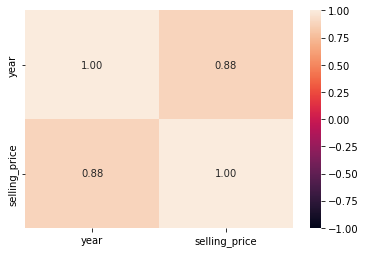

In [29]:
c1=car.groupby('year')[['selling_price']].mean().reset_index()
corr1=c1.corr()
sns.heatmap(corr1,annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

$Conclusion$: Average selling price and year have the strong correlation.

#### Car Brand based selling price

In [30]:
br=car.groupby('Car Brand')['selling_price'].mean()
bi=br.index.tolist()
bv=br.values.tolist()
print(bi)
print(bv)

['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']
[200000.0, 2185451.6129032257, 2242800.0, 232713.1655629139, 60000.0, 296551.6551724138, 287093.71875, 346000.0, 563627.2318181818, 539944.3981481482, 413340.612244898, 1500000.0, 2072999.8, 1530000.0, 1300000.0, 3609800.0, 1842500.0, 584780.4451219512, 332031.21361940296, 2299238.095238095, 843000.0, 457038.4038461539, 88500.0, 408399.9727272727, 475551.02040816325, 278672.4025974026, 838917.594117647, 461666.623655914, 2556250.0]


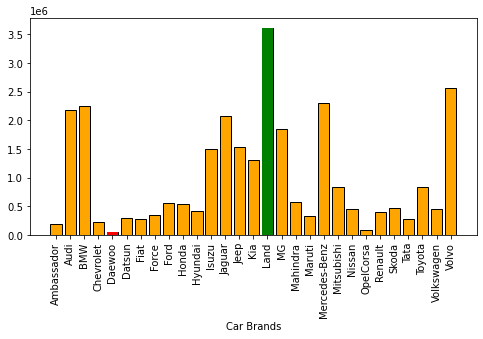

In [31]:
plt.figure(figsize=(8,4))
plt.bar(bi,bv,color='orange',edgecolor='black')
plt.bar(bi[bv.index(max(bv))],max(bv),color='green')
plt.bar(bi[bv.index(min(bv))],min(bv),color='red')
plt.xlabel('Car Brands')
plt.xticks(rotation=90)
plt.show()

$Conclusion$: In this Land Car brand has the highest selling price and Daewoo has the lowest selling price

In [32]:
car.columns

Index(['name', 'Car Brand', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [33]:
d3=car.groupby('fuel')[['selling_price']].mean()
d3.head()

,selling_price
fuel,
CNG,273162.081081
Diesel,614001.075000
Electric,310000.000000
LPG,171818.136364
Petrol,335344.340128


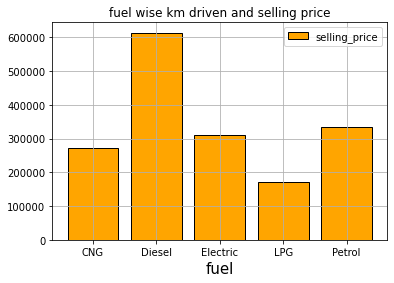

In [34]:
plt.bar(d3.index,d3['selling_price'],label='selling_price',color='orange',edgecolor='black')
plt.title('fuel wise km driven and selling price')
plt.xlabel('fuel',fontsize=15)
#plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.savefig('fuel wise km driven and selling price')
plt.show()

$Conclustion$:
* The Conclustion from the above graph that the <b>LPG</b> the mean selling price is less then all other fuels but the  Km Driven is considerable higher then the all other fuels.
* The Selling Price of the Diesel car is Higher then all other fuel cars.

In [35]:
own=car.groupby('owner')[['selling_price']].mean()

own# average selling price based on owner

,selling_price
owner,
First Owner,565385.447250
Fourth & Above Owner,181213.293333
Second Owner,341954.140082
Test Drive Car,954293.941176
Third Owner,266142.207612


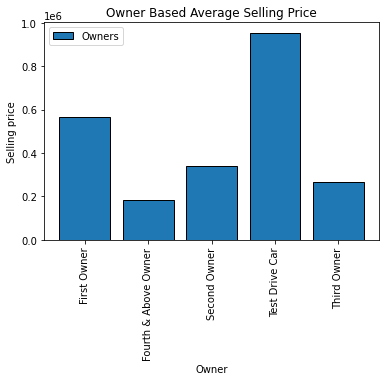

In [36]:
# lets plot it in the graph
plt.bar(own.index,own['selling_price'],label='Owners',edgecolor='black')
plt.title('Owner Based Average Selling Price')
plt.legend()
plt.ylabel('Selling price')
plt.xlabel('Owner')
plt.xticks(rotation=90)
plt.show()

$Observation$: 
* Test Drive car's selling price are higher than all other cars. Because these cars are directly from the showroom.
* Fourth & Above-Owner car's selling price are less than all other cars' selling prices. 
* Because these cars are used by more than four owners, so there may be worse fuel efficiency, old technology are reasons for the drop in selling price.

In [37]:
car.columns

Index(['name', 'Car Brand', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [38]:
car.head()

,name,Car Brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Ambassador CLASSIC 1500 DSL AC,Ambassador,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2,Ambassador Classic 2000 Dsz,Ambassador,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner
3,Ambassador Grand 1800 ISZ MPFI PW CL,Ambassador,2012,430000,50000,Petrol,Individual,Manual,Second Owner
4,Audi A4 1.8 TFSI,Audi,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner
5,Audi A4 2.0 TDI,Audi,2011,1295000,58000,Diesel,Dealer,Automatic,First Owner


In [39]:
s1=car['seller_type'].value_counts()
s1=car.groupby('seller_type')['selling_price'].mean()
print(s1.index)
s1.values

Index(['Dealer', 'Individual', 'Trustmark Dealer'], dtype='object', name='seller_type')


array([652699.39044944, 424904.02436441, 822272.72727273])

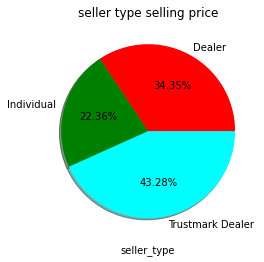

In [40]:
plt.pie(s1.values,labels=s1.index,colors=['red','green','cyan'],autopct='%.2f%%',shadow='True')
plt.title('seller type selling price')
plt.xlabel('seller_type')
#plt.ylabel('mean selling price')
plt.show()

$Conclustion$: We saw in the previous graph the seller_type count of Trustmarker Dealer is very low. But this graph is the opposite, in which the average selling price of the Trustmark Dealer is higher than the other two selling types.

### Creating ML model

In [41]:
# so filtering outliers using quantile 
min_thresold,max_thresold=car.km_driven.quantile([0.05,0.95])
df=car[(car.km_driven > min_thresold)&(car.km_driven < max_thresold)]
min_sell,max_sell=car.selling_price.quantile([0.05,0.95])
df=car[(car.selling_price > min_sell)&(car.selling_price < max_sell)]
#df.head()

In [42]:
car['Car Brand'].value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Mitsubishi          5
Land                5
Jaguar              5
Volvo               4
Ambassador          3
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
Name: Car Brand, dtype: int64

In [43]:
df= df[(df['Car Brand'] != 'Kia')&(df['Car Brand']!='Daewoo')&(df['Car Brand']!='Force')&(df['Car Brand']!='Isuzu')
       &(df['Car Brand']!='MG')&(df['Car Brand']!='OpelCorsa')
       &(df['Car Brand']!='Jeep')&(df['Car Brand']!='Ambassador')]
df=df[(df['Car Brand']!='Mitsubishi')&(df['Car Brand']!='BMW')&
      (df['Car Brand']!='Mercedes-Benz')&(df['Car Brand']!='Audi')]
df=df[(df['Car Brand']!='Skoda')&(df['Car Brand']!='Fiat')
      &(df['Car Brand']!='Datsun')&(df['Car Brand']!='Nissan')]

In [44]:
df['Car Brand'].value_counts()

Maruti        973
Hyundai       597
Mahindra      300
Tata          252
Honda         208
Ford          203
Chevrolet     143
Toyota        135
Renault       110
Volkswagen     92
Name: Car Brand, dtype: int64

In [45]:
df['fuel'].value_counts()
df=df[df['fuel'] !='Electric']
df=df[df['fuel']!='LPG']
df['fuel'].value_counts()

Diesel    1505
Petrol    1453
CNG         36
Name: fuel, dtype: int64

$LableEncoder$

In [88]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [87]:
df['name']=lb.fit_transform(df['name'])
df['seller_type']=lb.fit_transform(df['seller_type'])
df['transmission']=lb.fit_transform(df['transmission'])
df['owner']=lb.fit_transform(df['owner'])
df['fuel']=lb.fit_transform(df['fuel'])
df['Car Brand']=lb.fit_transform(df['Car Brand'])

In [86]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
sts=['km_driven']
df[sts]=scaler.fit_transform(df[sts])
#df.shape

In [67]:
#df.head()

In [68]:
#corr=df.corr()
#sns.heatmap(corr,annot=True)
#plt.show()

$Observation$:- 
* From the above heat map Selling Price and Year have moderate postive correlation. <br>
* All other columns are negtively correlated with Selling Price 

In [69]:
#df.info

In [70]:
x=df.drop(['selling_price'],axis=1)
y=df['selling_price']
#print(type(x))
#print(type(y))
#print(x.shape)
#print(y.shape)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,train_size=0.65,random_state=42)

In [72]:
#print(type(y_train),type(y_test))# y are series
#print(type(x_test),type(x_train))# x are DataFrame

In [73]:
x_train.head()

,name,Car Brand,year,km_driven,fuel,seller_type,transmission,owner
1989,604,4,2013,0.334179,1,0,1,0
2663,760,5,2015,0.009791,2,1,1,0
621,164,2,2014,-1.125876,2,1,0,0
1620,404,3,2010,1.042216,1,1,1,2
2383,634,5,2010,0.009791,2,1,1,2


In [74]:
#y_train.head()

In [75]:
#print(x_train.shape,x_test.shape)# x shape
#print(y_train.shape,y_test.shape)# y shape

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

### KNeighborsRegressor()

In [77]:
knn=KNeighborsRegressor(n_neighbors=10,metric='manhattan')
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
mean_absolute_error(y_test,y_pred_knn)
r2_score(y_test,y_pred_knn)

0.6914219093609506

In [78]:
knn.score(x_train,y_train)
knn.score(x_test,y_test)

0.6914219093609506

### LinearRegression()

In [79]:
lg = LinearRegression()
lg.fit(x_train,y_train)
y_pred_lg=lg.predict(x_test)
mean_squared_error(y_test,y_pred_lg)

31566433781.13917

#### Ridge Regression

In [80]:
rg = Ridge(alpha=3)  # lambda = alpha
rg.fit(x_train,y_train)
y_pred_rg=rg.predict(x_test)
mean_absolute_error(y_test,y_pred_rg)

137362.12465809917

### Lasso Regression()

In [81]:
lasso = Lasso(alpha=0.2) # lambda = alpha = 0.1,0.2
lasso.fit(x_train,y_train)
y_pred_lo=lasso.predict(x_test)
mean_absolute_error(y_test,y_pred_rg)

137362.12465809917

### Saving The best model

In [82]:
import pickle

In [83]:
# saving the best model in binary format
# wb-write binary 
filename = 'Knn_model.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [84]:
# saving the best model in binary format 
# wb-write binary
filename= 'df.plk'
pickle.dump(df,open(filename,'wb'))

In [92]:
#knn=pickle.load(open('knn_model.pkl','rb'))
#y_pred1=knn.predict(x_test)
#r2_score(y_test,y_pred1)